In [4]:
import csv
import numpy as np

print "function: write_tuples(filename,neworappend,header,tuples)"
print "function: mytups,mydict=csv_to_dict(filenm)"
print "function: mydiccol=TupEnt_to_DictCol(filt_tups,header):"
header=("readno","letter","color")
tuples=[('1','b','red'),('2','e','blue'),('3','h','green')]
filenm="DeadPool400.cv"
neworappend="a" # w is new and a is append

def write_tuples(filename,neworappend,header,tuples):
    while True:
        try:
        # Append data to file or Create a New File
        #===============================================================================
            f=open(filenm)
            f.close()
            with open(filenm,neworappend) as the_file:
                csv.register_dialect("custom", delimiter=",", skipinitialspace=True)
                writer = csv.writer(the_file, dialect="custom")
                if neworappend=='w':
                    writer.writerow(header)
                for tup in tuples:
                    writer.writerow(tup)
            break
        # If there is not a file create a new file with header
        #===============================================================================
        except IOError:
            print "no file so making file"
            f=open(filenm,"w")
            f=f.close()
            with open(filenm,"a") as the_file:
                csv.register_dialect("custom", delimiter=",", skipinitialspace=True)
                writer = csv.writer(the_file, dialect="custom")
                writer.writerow(header)

                
    write_tuples(filenm,neworappend,header,tuples)






function: write_tuples(filename,neworappend,header,tuples)
function: mytups,mydict=csv_to_dict(filenm)
function: mydiccol=TupEnt_to_DictCol(filt_tups,header):
no file so making file


### Reading In CSV anc converting to tuple dictionaries (long ways and short ways)

In [5]:
def csv_to_dict(filenm):
    mydat=[]
    print "1. getting ready to open file"
    with open(filenm, 'rb') as f:
        reader = csv.reader(f)
        for row in reader:
            mydat.append(row)  

    print "2. read file"
    mydattup=zip(*[tuple(row) for row in mydat[1:]])
    mydict=dict(zip(mydat[0],mydattup))
    print "3. made column dictionary"
    mytups=[tuple(entry) for entry in mydat]
    print "                "
    print "these are the headers"
    print "====================="
    print mydat[0]
    return (mytups,mydict)

In [6]:
mytups,mydict=csv_to_dict(filenm)

1. getting ready to open file
2. read file
3. made column dictionary
                
these are the headers
['readno', 'letter', 'color']


#### can print out the contents of any column using the dictionary

In [7]:
mydict['color']

('red', 'blue', 'green')

#### can print out the rows using the tuples

In [8]:
mytups


[('readno', 'letter', 'color'),
 ('1', 'b', 'red'),
 ('2', 'e', 'blue'),
 ('3', 'h', 'green')]

#### Filter Entries 

In [9]:
filt_tups=filter(lambda x:x[1]=='b' or x[1]=='e',mytups) 

#### Entries (tuples) --> Columns (dictionary)

In [10]:
def TupEnt_to_DictCol(filt_tups,header):
    a=dict(zip(header,zip(*filt_tups)))
    return a

In [11]:
color_dict=TupEnt_to_DictCol(filt_tups,mytups[0])
print color_dict

{'color': ('red', 'blue'), 'letter': ('b', 'e'), 'readno': ('1', '2')}


#### Columns (Dictionary) --> Entries (tuples)

In [12]:

def DictCol_to_TupEnt(TheDict,YourHeader):
    column=[TheDict[heading] for heading in YourHeader]
    rowentries=zip(*column)
    mynewtups=[header]+rowentries
    return mynewtups

In [13]:
header=('color','readno')
print DictCol_to_TupEnt(color_dict,header)

[('color', 'readno'), ('red', '1'), ('blue', '2')]


#### to convert string variables into numbers do this

In [14]:
mydict['readno']=np.array((mydict['readno']),dtype='float')
print mydict['readno']

[ 1.  2.  3.]


#### convert tuple to list 

In [15]:
newlist=[list(entry) for entry in mytups]
newlist=map(lambda x:float(x[0]),newlist[1:])

### Group by unique keys and return dictionary 

In [116]:

anktup=[('name','attempt','social','time'),("vimes",2,'watch','noon'),("madarthur",4,'watch','night'),("sybil",3,'noble','noon'),("vetenari",4,'noble','night')]

def GroupbyDict(iterable,key1): 
    mytups=iterable[1:]
    myheader=iterable[0]
    #things that need to be generated
    key1index=myheader.index(key1)
    mydic=TupEnt_to_DictCol(mytups,myheader)
    flavors=list(set(mydic[key1]))
    flavor_groups=[]

    #Group by 1st Key
    #=================================================
    for flavor in flavors:
        print flavor
        flavorgroup=filter(lambda x:x[key1index]==flavor,mytups)
        flavor_groups.append(flavorgroup)

    
    return dict(zip(flavors,flavor_groups))


In [117]:
discworlddic=GroupbyDict(anktup,'social')

print discworlddic

noble
watch
{'noble': [('sybil', 3, 'noble', 'noon'), ('vetenari', 4, 'noble', 'night')], 'watch': [('vimes', 2, 'watch', 'noon'), ('madarthur', 4, 'watch', 'night')]}


In [110]:
dwh=('name','attempt','social','time')
for entry in discworlddic:
    gr=[dwh] + discworlddic[entry]
    regroupedentry=GroupbyDict(gr,'time')
    discworlddic[entry]=regroupedentry

noon
night
noon
night


In [73]:



unique_colors=list(set(mydict["color"]))
myit=anktup
set()
print unique_colors

groups=[]
for color in unique_colors:
    mycolorgroup=filter(lambda x:x[2]==color,mytups)
    groups.append(mycolorgroup)
    color_dict=dict(zip(unique_colors,groups))
    

['blue', 'green', 'red']


### This is how to import a bunch of files using glob and split up the filenames (click for code)


import glob
myg=glob.glob('GraphReadyPatientData/*.csv')

patientlist=[]
for filepath in myg:
    patname=re.split("Pat|.csv",filepath)[2]
    spaceno=3-len(patname)
    patname=patname+spaceno*"_"
    patientlist.append(patname)

### This is how you count things in a list

In [6]:
from collections import Counter
a=list('helloworldhelloworld')
count_obj=Counter(a) #create count obj
print count_obj
count_obj_dict=dict(count_obj)
print count_obj_dict
most_common=count_obj.most_common(1) #find first (1) most common letter, 2nd most two ect
totalletters=sum(count_obj.values())
print totalletters

Counter({'l': 6, 'o': 4, 'e': 2, 'd': 2, 'h': 2, 'r': 2, 'w': 2})
{'r': 2, 'e': 2, 'd': 2, 'w': 2, 'h': 2, 'l': 6, 'o': 4}
20


In [2]:
my=[1,2,3,3,3,4]
my.count(3)

3

### Not in methods: This is how you remove things from a list

In [3]:
a=[1,2,3,4,5,5]
filt_a=[num for num in a if num not in [3,4]]
print filt_a

[1, 2, 5, 5]


### This is how you count things in a list

In [4]:
[1, 2, 3, 4, 1, 4, 1].count(1)

3

### this is how you effectively delete things in a dictonary
first you pop it out of the dictionary and change the key to none

In [ ]:

d = {'a':'hello','b':'world','c':'hi'}
entriesToRemove = ('a', 'b')
for k in entriesToRemove:
    d.pop(k, None)



String methods

In [1]:
ms="helloworld"
ms.find("world")

5

In [2]:
ms[5::]

'world'

Remove one key in a dictionary

In [ ]:
pa['A'] = pa.pop('A ')

### Graphing with Legend

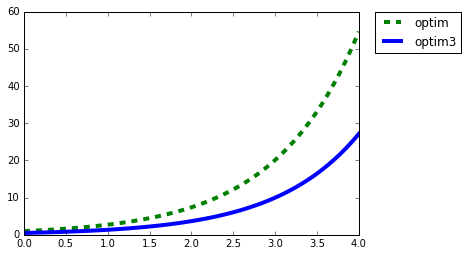

In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
y1,x1=zip(*[(np.exp(i),i) for i in np.linspace(0,4.00,100)])
y2,x2=zip(*[(np.exp(i-0.7),i) for i in np.linspace(0,4.00,100)])
plt.plot(x1,y1, 'g--',lw=4,label="optim")
plt.plot(x2,y2, 'b',lw=4,label="optim3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


### dictionary to tuple

In [20]:
mydict={'A':1,'B':2,'C':3}
mydict.items()

[('A', 1), ('C', 3), ('B', 2)]

In [1]:
import datetime
time_past=datetime.datetime.now() - datetime.timedelta(seconds=5)
time_now=datetime.datetime.now()

mp=float(time_past.strftime('%M'))
mn=float(time_now.strftime('%M'))

if mp!=mn:
    print mn

In [2]:
mp

46.0